In [1]:
import numpy as np
from sklearn import datasets
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
Iris = datasets.load_iris()
X_values = np.array([[x[0], x[3]] for x in Iris.data])
Y_values = np.array([1 if y==0 else -1 for y in Iris.target])

In [3]:
train_section = np.random.choice(len(X_values), round(len(X_values)*0.8), replace=False)
test_section = np.array(list(set(range(len(X_values))) - set(train_section)))
X_train = X_values[train_section]
X_test = X_values[test_section]
Y_train = Y_values[train_section]
Y_test = Y_values[test_section]

x_data = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
W = tf.Variable(tf.random_normal(shape=[2,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [4]:
Model_output = tf.subtract(tf.matmul(x_data, W), b)

In [5]:
Norm = tf.reduce_sum(tf.square(W))
Lambda = tf.constant([0.1])

In [6]:
classification = tf.reduce_mean(tf.maximum(0., tf.subtract(1., tf.multiply(Model_output, y_target))))

In [7]:
loss_function = tf.math.add(classification, tf.multiply(Lambda, Norm))

In [8]:
sess = tf.Session()
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss_function)
init = tf.initialize_all_variables()
sess.run(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [9]:
for i in range(1500):
    sess.run(train_step, feed_dict={x_data: X_train, y_target:np.transpose([Y_train])})

In [10]:
[[a1], [a2]] = sess.run(W)
[[b]] = sess.run(b)
sess.close()
slope = -a2/a1
y_intercept = b/a1
xx = np.linspace(0, 3, 50)
yy=slope * xx + y_intercept
setsosa_x = [d[1] for i,d in enumerate(X_values) if Y_values[i]==1]
setsosa_y = [d[0] for i,d in enumerate(X_values) if Y_values[i]==1]
not_setsosa_x = [d[1] for i,d in enumerate(X_values) if Y_values[i]==-1]
not_setsosa_y = [d[1] for i,d in enumerate(X_values) if Y_values[i]==-1]

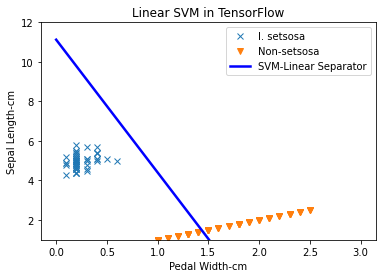

In [11]:
plt.plot(setsosa_x, setsosa_y, 'x', label='I. setsosa')
plt.plot(not_setsosa_x, not_setsosa_y, 'v', label='Non-setsosa')
plt.plot(xx, yy, 'b-', label='SVM-Linear Separator', linewidth=2.5)
plt.ylim([1, 12])
plt.legend(loc='upper right')
plt.title('Linear SVM in TensorFlow')
plt.xlabel('Pedal Width-cm')
plt.ylabel('Sepal Length-cm')
plt.show()